# CNN for MNIST Handwritten Digit Classification

In this notebook, I develop a CNN for classifying MNIST datasets, evaluate the
performance of the final model, and use it to make predictions on new images. While working on the code, I followed this guide: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

### Load Dataset

11493376/11490434 [==============================] - 0s 0us/step
Training Data Shape: X=(60000, 28, 28), y=(60000,)
Test Data Shape: X=(10000, 28, 28), y=(10000,)


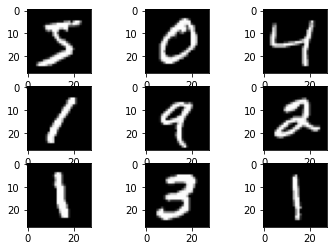

In [1]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot

# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

# summarize loaded dataset by printing their shape
print('Training Data Shape: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test Data Shape: X=%s, y=%s' % (testX.shape, testY.shape))

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

In [2]:
# reshape data arrays to have a single color channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [3]:
# one hot encode target values
# transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes

from keras.utils import to_categorical

train_Y = to_categorical(trainY)
test_Y = to_categorical(testY)

### Prepare Pixel Data

In [4]:
# Normalize the pixel values of grayscale images to range [0,1].

# first convert from unsigned integers to floats
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')

# then divide the pixel values by the maximum value
trainX_norm = trainX_norm / 255.0
testX_norm = testX_norm / 255.0

In [5]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(trainX_norm, train_Y, test_size = 0.1, random_state=2)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (54000, 28, 28, 1)
x_test shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_test shape (6000, 10)


### Define Model

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam, SGD

# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.20))
model.add(Flatten())

model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Get summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [7]:
# Define the optimizer
# Adam(lr=0.01, beta_1=0.9, beta_2=0.999)
opt = SGD(lr=0.001, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the Model

In [9]:
epochs = 50
batch_size = 250

history = model.fit(X_train,Y_train, batch_size=batch_size, epochs = epochs, 
                              validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
216/216 [==============================] - 24s 107ms/step - loss: 1.2988 - accuracy: 0.5948 - val_loss: 0.3871 - val_accuracy: 0.8928
Epoch 2/50
216/216 [==============================] - 23s 106ms/step - loss: 0.3934 - accuracy: 0.8871 - val_loss: 0.3015 - val_accuracy: 0.9138
Epoch 3/50
216/216 [==============================] - 23s 105ms/step - loss: 0.3145 - accuracy: 0.9077 - val_loss: 0.2659 - val_accuracy: 0.9230
Epoch 4/50
216/216 [==============================] - 23s 105ms/step - loss: 0.2828 - accuracy: 0.9186 - val_loss: 0.2401 - val_accuracy: 0.9330
Epoch 5/50
216/216 [==============================] - 23s 105ms/step - loss: 0.2536 - accuracy: 0.9267 - val_loss: 0.2214 - val_accuracy: 0.9362
Epoch 6/50
216/216 [==============================] - 22s 103ms/step - loss: 0.2325 - accuracy: 0.9325 - val_loss: 0.2065 - val_accuracy: 0.9407
Epoch 7/50
216/216 [==============================] - 22s 103ms/step - loss: 0.2197 - accuracy: 0.9362 - val_loss: 0.1971 - val_ac

In [10]:
# save the model
model.save('MNIST_CNN.h5')

### Evaluate the Model

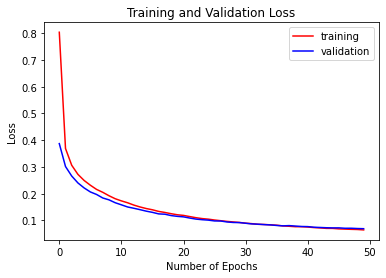

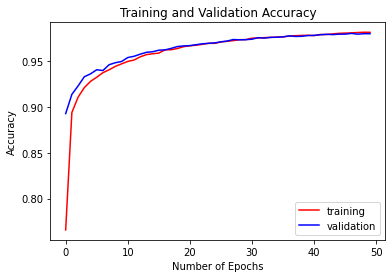

In [11]:
# Plot the loss and accuracy curves for training and validation 

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='r', label="training")
plt.plot(history.history['val_loss'], color='b', label="validation")
plt.title("Training and Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('loss.png')
plt.show()

plt.plot(history.history['accuracy'], color='r', label="training")
plt.plot(history.history['val_accuracy'], color='b', label="validation")
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('acc.png')
plt.show()

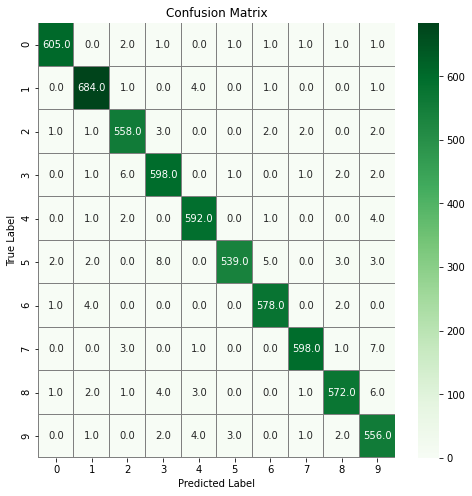

In [12]:
# Confusion matrix

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()